In [39]:
import pandas as pd
import matplotlib.pyplot as plt

In [82]:

#läser in min fil och som tilldelas variabelnamnet "df". 
df_kpif = pd.read_excel("KPIF-stats12month.xlsx")
# Här ersätter vi "M" med ett mellanslag för att underlätta tolkningen
df_kpif["Datum"] = df_kpif["Datum"].str.replace("M","-")


In [83]:
# Sätter Datumen till index istället för numeriska värden för bättre läsbarhet och funktionallitet
df_kpif.set_index("Datum", inplace=True)

df_kpif.index = pd.to_datetime(df_kpif.index)

In [42]:
df_property_price = pd.read_excel("Fastighetsindex.xlsx")

In [43]:
df_property_price.set_index("År",inplace=True)

<Axes: xlabel='År'>

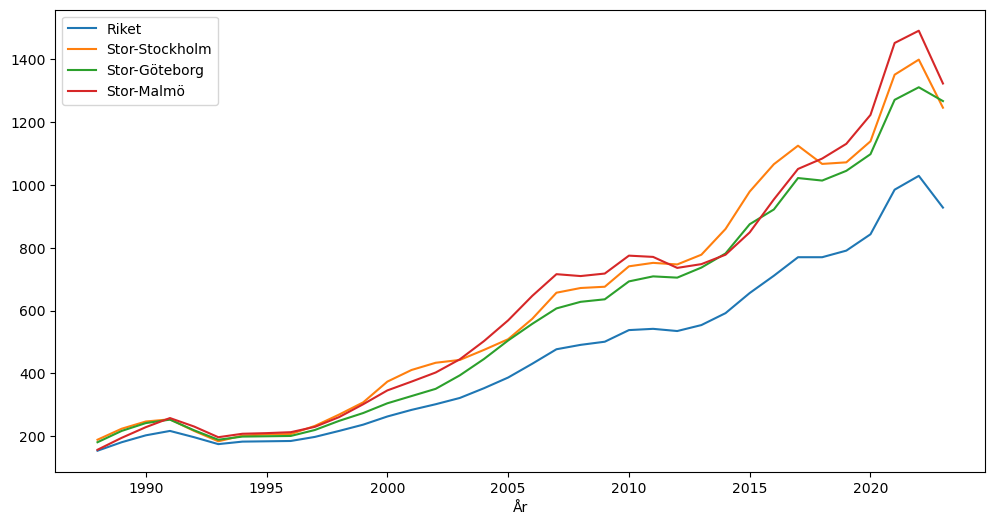

In [44]:
df_property_price.plot(figsize=(12,6))

In [45]:
df_property_price.index

Index([1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999,
       2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011,
       2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023],
      dtype='int64', name='År')

In [46]:
df_bostadsratt_kvmpris = pd.read_excel("bostadsrattspriser.xlsx")

In [47]:
df_bostadsratt_kvmpris.set_index("År",inplace=True)

In [85]:
#yearly_median_kpif = df_kpif.groupby(pd.Grouper(freq='Y')).median()

# Optional: Convert the index to just the year as an integer
#yearly_median_kpif.index = yearly_median_kpif.index.year

# Display the resulting DataFrame
#df_kpif_median = yearly_median_kpif

#Kommenterar ut all kod ovan då jag bara behövde koden för att skapa en ny fil. Kommer läsa in den filen i en egen variabel nedan.

df_kpif_median = pd.read_excel("kpif-stats-medianyear.xlsx", index_col="Datum")

df_kpif_median

,KPIF
Datum,
1988,5.55
1989,6.30
1990,10.10
1991,9.50
1992,1.75
1993,5.05
1994,2.40
1995,2.65
1996,1.30


In [49]:
#Sparar median KPIF till excel-fil som resten av datafilerna.

df_kpif_median.to_excel("kpif-stats-medianyear.xlsx",index=True) 

In [50]:
df_bostadsratt_kvmpris.index


Index([2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016,
       2017, 2018, 2019, 2020, 2021, 2022, 2023],
      dtype='int64', name='År')

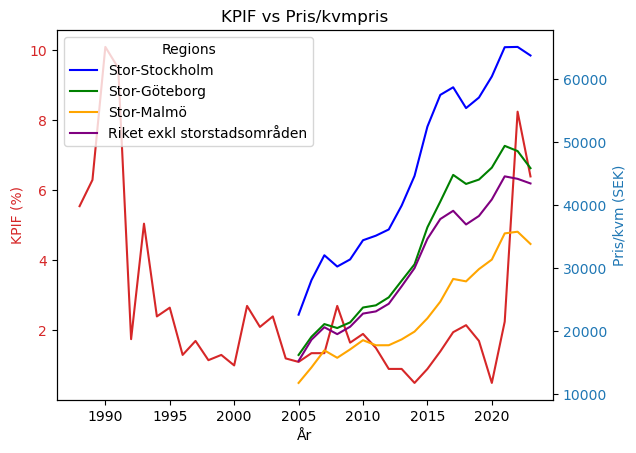

In [51]:

fig, ax1 = plt.subplots()


color = 'tab:red'
ax1.set_xlabel('År')
ax1.set_ylabel('KPIF (%)', color=color)
ax1.plot(df_kpif_median.index, df_kpif_median['KPIF'], color=color)
ax1.tick_params(axis='y', labelcolor=color)


ax2 = ax1.twinx()  
color = 'tab:blue'
ax2.set_ylabel('Pris/kvm (SEK)', color=color)


colors = ['blue', 'green', 'orange', 'purple']  
for i, column in enumerate(df_bostadsratt_kvmpris.columns):
    ax2.plot(df_bostadsratt_kvmpris.index, df_bostadsratt_kvmpris[column], color=colors[i], label=column)
ax2.tick_params(axis='y', labelcolor=color)


plt.title('KPIF vs Pris/kvmpris')
ax2.legend(title='Regions', loc='upper left')

plt.show()

In [59]:
df_arbetsloshet = pd.read_excel("arbetsloshet.xlsx", index_col="Datum")

In [69]:

# Extract the year as a substring and convert to int
df_arbetsloshet['År'] = df_arbetsloshet.index.str[:4].astype('int64')

# Group by the year and calculate the median
median_arbetsloshet = df_arbetsloshet.groupby('År')['Inskrivna arbetslösa'].median()

# The result is a series with the year as the index (int64) and the median values as the data
print(median_arbetsloshet)

median_arbetsloshet.to_excel("arbetsloshet-median.xlsx",index=True)

År
1996    579860.0
1997    547593.5
1998    427885.0
1999    388820.5
2000    319764.0
2001    286532.5
2002    283419.0
2003    298084.0
2004    326647.5
2005    342779.5
2006    314451.5
2007    219485.0
2008    217865.0
2009    357338.5
2010    406374.5
2011    371553.5
2012    394297.5
2013    402092.5
2014    373698.5
2015    370450.5
2016    360913.0
2017    361009.0
2018    342366.0
2019    348874.0
2020    452920.0
2021    408208.0
2022    335670.0
2023    333353.5
Name: Inskrivna arbetslösa, dtype: float64
